In [ ]:
ClearAll["Global`*"];
{brown,green,beige,blue}=RGBColor/@{"#640125","#6e7955","#cbb994","#165e83"};
<<"MaTeX`";

(* parameters *)
nu=1. (* heat conductivity *);
SimTime=0.1;
BoxSize=1;
{tMin,tMax}={0,SimTime} (* time *);
{xMin,xMax}={-BoxSize/2.,BoxSize/2.} (* x coordinate *);
xgr=128;dx=BoxSize/(xgr-1);
tgr=4096;dt=SimTime/(tgr-1);
std=0.3; (* sigma of the random variable *)

nu*dt/dx^2<=1/2 (* for nbumerical stability *)

In [ ]:
(* Initial conditions NO NEED TO RUN THIS EVERY TIME *)
Xi=RandomFunction[WhiteNoiseProcess[std],{1,2*xgr+1}];
ListPlot[Xi,Filling->Axis]
(* To obtain values, run Xi["Values"][[i]], i=1,...,2*xgr+1 *)

In [ ]:
logphiinidata[n_]:=Xi["Values"][[2*xgr+1]]+Sum[Xi["Values"][[i]]*Sin[2*Pi*i*n/(xgr-1)]+Xi["Values"][[i+xgr]]*Cos[2*Pi*i*n/(xgr-1)],{i,1,5}]
data=Array[logphiinidata[#-1]&,xgr];
Export["logphiini_100_01_002.dat",data]; (* _xgr_sigma_ID *)

In [ ]:
logphiinidata2[n_]:=Xi["Values"][[2*xgr+1]]+Sum[Xi["Values"][[i]]*Log[Abs[Sin[2*Pi*i*n/(xgr-1)]+0.5]]+Xi["Values"][[i+xgr]]*Log[Abs[Cos[2*Pi*i*n/(xgr-1)]+0.5]],{i,1,5}]
data2=Array[logphiinidata2[#-1]&,xgr];
Export["logphiini2_100_01_002.dat",data2]; (* _xgr_sigma_ID *)

In [ ]:
Clear[itpphiini,hom]
(* dataimp=Import["logphiini_100_01_002.dat"];*)
dataimp=Import["logphiini2_100_01_002.dat"];
dataimpext=Append[dataimp,dataimp[[1]]];
itpimpdata=Interpolation[Table[{j,dataimpext[[j]]},{j,xgr}],InterpolationOrder->3];
itpphiini[x_?NumericQ]:=Exp[-itpimpdata[(x-xMin)/dx+1][[1]]];
hom=Sum[itpphiini[i/32],{i,xMin*32,xMax*32}]/32/BoxSize;

thickness=0.04;colorIni=gray;colorFin=sora;
graph1=Plot[{hom,itpphiini[x]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","\psi_{ini}"}],BaseStyle->{FontSize->12,FontFamily->"Latin Modern Roman"},ImageSize->300,PlotRange->{-1,5},PlotStyle->{{Thickness[thickness/5],sakura},{Thickness[thickness/5],aomidori}}]

In [ ]:
xGrid=Range[xMin,xMax,dx];
phi0={};
For[i=1,i<=xgr,i++,
  AppendTo[phi0,itpphiini[xGrid[[i]]]]
];
phi=phi0;
results={phi};

For[t=1,t<=tgr-1,t++,
  phiNew=phi;
  For[i=2,i<=xgr-1,i++,
    phiNew[[i]]=phi[[i]]+nu*dt/dx^2*(phi[[i-1]]-2*phi[[i]]+phi[[i+1]]);
  ];
  phiNew[[1]]=phi[[1]]+nu*dt/dx^2*(phi[[xgr-1]]-2*phi[[1]]+phi[[2]]);
  phiNew[[xgr]]=phiNew[[1]];
  phi=phiNew;
  AppendTo[results,phi];
];

graph2=ListLinePlot[{results[[1]],results[[4]],results[[820]]},DataRange->{xMin,xMax},PlotRange->All,PlotStyle->{brown,green,beige},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=0.01","\[Tau]=0.02"}],{Right,Top}],
 AxesLabel->{"x","\[Psi]"}];
graph22=Plot[hom,{x,xMin,xMax},AxesLabel->{"x",Subscript["\[Psi]","ini"]},BaseStyle->{FontSize->30,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotRange->{-1,5},PlotStyle->{Dashed,blue}];

Show[graph2,graph22]
Export["phi241214_2.pdf",%]


In [ ]:
u0={};
approxu0={};
AppendTo[u0,-(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[1]]];
AppendTo[approxu0,-(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
For[i=2,i<=xgr-1,i++,
  AppendTo[u0,-(nu*xgr/BoxSize)*(results[[1]][[i+1]]-results[[1]][[i-1]])/results[[1]][[i]]];
  AppendTo[approxu0,-(nu*xgr/BoxSize)*(results[[1]][[i+1]]-results[[1]][[i-1]])/hom];
];
AppendTo[u0,-(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/results[[1]][[xgr]]];
AppendTo[approxu0,-(nu*xgr/BoxSize)*(results[[1]][[2]]-results[[1]][[xgr-1]])/hom];
u=u0;
approxu=approxu0;
uresults={u};
approxuresults={approxu};

For[t=1,t<=tgr,t++,
  uNew=u;
  approxuNew=approxu;
  uNew[[1]]=-(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[1]];
  approxuNew[[1]]=-(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  For[i=2,i<=xgr-1,i++,
    uNew[[i]]=-(nu*xgr/BoxSize)*(results[[t]][[i+1]]-results[[t]][[i-1]])/results[[t]][[i]];
    approxuNew[[i]]=-(nu*xgr/BoxSize)*(results[[t]][[i+1]]-results[[t]][[i-1]])/hom;
  ];
  uNew[[xgr]]=-(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/results[[t]][[xgr]];
  approxuNew[[xgr]]=-(nu*xgr/BoxSize)*(results[[t]][[2]]-results[[t]][[xgr-1]])/hom;
  u=uNew;
  approxu=approxuNew;
  AppendTo[uresults,u];
  AppendTo[approxuresults,approxu];
];

graph3=ListLinePlot[{uresults[[1]],uresults[[41]],uresults[[1227]]},DataRange->{xMin,xMax},PlotRange->All,ImageSize->500,PlotStyle->{brown,green,beige},PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=0.001","\[Tau]=0.005"}],{Right,Top}],
 AxesLabel->{"x","u"},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"}];
graph4=ListLinePlot[{approxuresults[[1]],approxuresults[[41]],approxuresults[[205]]},DataRange->{xMin,xMax},PlotRange->All,ImageSize->500,PlotStyle->{{Dashed,brown},{Dashed,green},{Dashed,beige}}, 
 AxesLabel->{"x",Subscript["u","approx"]},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"}];

In [ ]:
Show[graph3,graph4]
Export["u241214_2.pdf",%]

In [ ]:
Reynolds0={};
One={};
AppendTo[Reynolds0,Abs[uresults[[1]][[1]]*(uresults[[1]][[2]]-uresults[[1]][[xgr-1]])*dx/(2*nu*(uresults[[1]][[2]]+uresults[[1]][[xgr-1]]-2*uresults[[1]][[1]]))]];
AppendTo[One,1];
For[i=2,i<=xgr-1,i++,
  AppendTo[Reynolds0,Abs[uresults[[1]][[i]]*(uresults[[1]][[i+1]]-uresults[[1]][[i-1]])*dx/(2*nu*(uresults[[1]][[i+1]]+uresults[[1]][[i-1]]-2*uresults[[1]][[i]]))]];
  AppendTo[One,1];
];
AppendTo[Reynolds0,Abs[uresults[[1]][[1]]*(uresults[[1]][[2]]-uresults[[1]][[xgr-1]])*dx/(2*nu*(uresults[[1]][[2]]+uresults[[1]][[xgr-1]]-2*uresults[[1]][[1]]))]];
AppendTo[One,1];
Reynolds={Reynolds0};

For[t=1,t<=tgr,t++,
  ReynoldsNew=Reynolds0;
  ReynoldsNew[[1]]=Abs[uresults[[t]][[1]]*(uresults[[t]][[2]]-uresults[[t]][[xgr-1]])*dx/(2*nu*(uresults[[t]][[2]]+uresults[[t]][[xgr-1]]-2*uresults[[t]][[1]]))];
  For[i=2,i<=xgr-1,i++,
    ReynoldsNew[[i]]=Abs[uresults[[t]][[i]]*(uresults[[t]][[i+1]]-uresults[[t]][[i-1]])*dx/(2*nu*(uresults[[t]][[i+1]]+uresults[[t]][[i-1]]-2*uresults[[t]][[i]]))];
  ];
  ReynoldsNew[[xgr]]=Abs[uresults[[t]][[1]]*(uresults[[t]][[2]]-uresults[[t]][[xgr-1]])*dx/(2*nu*(uresults[[t]][[2]]+uresults[[t]][[xgr-1]]-2*uresults[[t]][[1]]))];
  Reynoldst=ReynoldsNew;
  AppendTo[Reynolds,Reynoldst];
];

graph=ListLinePlot[{Reynolds[[1]],Reynolds[[41]],Reynolds[[1227]],One},DataRange->{xMin,xMax},PlotRange->{0,10},ImageSize->500,PlotStyle->{brown,green,beige,blue},PlotLegends->Placed[LineLegend[{"\[Tau]=0","\[Tau]=0.001","\[Tau]=0.005"}],{Right,Top}],
 AxesLabel->{"x","Re"},BaseStyle->{FontSize->17,FontFamily->"Latin Modern Roman"}]

In [ ]:
I2={};
approxI2={};
ratioI2={};
For[t=1,t<=tgr,t++,
  AppendTo[I2,{t*dt,Sum[uresults[[t]][[i]]^2,{i,1,xgr}]/xgr}];
  AppendTo[approxI2,{t*dt,Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]/xgr}];
  AppendTo[ratioI2,{t*dt,Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]/Sum[uresults[[t]][[i]]^2,{i,1,xgr}]}]
];

graph5=ListLinePlot[{I2,approxI2},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_2"}]]
graph6=ListLinePlot[ratioI2,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{2{approx}}/I_2"}]]

In [ ]:
I3={};
approxI3={};
ratioI3={};
For[t=1,t<=tgr,t++,
  AppendTo[I3,{t*dt,Sum[uresults[[t]][[i]]^3,{i,1,xgr}]/xgr}];
  AppendTo[approxI3,{t*dt,Sum[approxuresults[[t]][[i]]^3,{i,1,xgr}]/xgr}];
  AppendTo[ratioI3,{t*dt,Sum[approxuresults[[t]][[i]]^3,{i,1,xgr}]/Sum[uresults[[t]][[i]]^3,{i,1,xgr}]}]
];

graph7=ListLinePlot[{I3,approxI3},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_3"}]]
graph8=ListLinePlot[ratioI3,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{3{approx}}/I_3"}]]

In [ ]:
I4={};
approxI4={};
ratioI4={};
For[t=1,t<=tgr,t++,
  AppendTo[I4,{t*dt,Sum[uresults[[t]][[i]]^4,{i,1,xgr}]/xgr}];
  AppendTo[approxI4,{t*dt,Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]/xgr}];
  AppendTo[ratioI4,{t*dt,Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]/Sum[uresults[[t]][[i]]^4,{i,1,xgr}]}]
];

graph9=ListLinePlot[{I4,approxI4},DataRange->{tMin,tMax},PlotRange->All,PlotStyle->{brown,green},
 AxesLabel->MaTeX[{"t","I_4"}]]
graph10=ListLinePlot[ratioI4,DataRange->{tMin,tMax},PlotRange->{0.5,1.5},PlotStyle->brown,
 AxesLabel->MaTeX[{"t","I_{4{approx}}/I_4"}]]

In [ ]:
beta={};
approxbeta={};
ratiobeta={};
For[t=1,t<=tgr,t++,
  beta1=Sum[uresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[uresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  beta2=Sum[approxuresults[[t]][[i]]^4,{i,1,xgr}]*xgr/Sum[approxuresults[[t]][[i]]^2,{i,1,xgr}]^2-3;
  AppendTo[beta,{t*dt,beta1}];
  AppendTo[approxbeta,{t*dt,beta2}];
  AppendTo[ratiobeta,{t*dt,beta2/beta1}]
];

graph11=ListLinePlot[{beta,approxbeta},DataRange->{tMin,tMax},PlotRange->{-2,0},BaseStyle->{FontSize->17},PlotStyle->{brown,{Dashed,green}},ImageSize->500,PlotStyle->{brown,green},PlotRangeClipping->False,
 PlotLegends->Placed[LineLegend[{"\[Beta]",Subscript["\[Beta]","approx"]}],{Right,Center}],AxesLabel->{"\[Tau]","\[Beta]"}]
Export["beta241214_2.pdf",%]
graph12=ListLinePlot[ratiobeta,DataRange->{tMin,tMax},PlotRange->{0,1.5},BaseStyle->{FontSize->12},ImageSize->350,PlotStyle->{Dashed,green},PlotRangeClipping->False,
 Ticks->{Automatic,{0,0.5,1.0,1.5}},AxesLabel->{"\[Tau]",Subscript["r","approx"]}]

In [ ]:
(* 論文用グラフ作成 *)
betaBL=Plot[-1.5,{t,0,240},PlotStyle->blue];
plotr=Plot[1,{t,0,240},PlotStyle->brown];
g1=Show[graph11,betaBL];
g2=Show[graph5];
g3=Show[graph6,plotr];
g4=Show[graph9];
g5=Show[graph10,plotr];
g6=Show[graph12,plotr];
g7=Show[g1,Graphics[Inset[g6,{120,-0.17},{Center},{120,1.2}]]]
Export["flatness241210.png",g7]

NIntegrate::ncvb:                                                                                                                                               -15               -14
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in x0 near {x0} = {-2.0118}. NIntegrate obtained -2.27862 10    and 1.20358 10    for the integral and error estimates.

NIntegrate::ncvb:                                                                                                                                                -15               -16
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in x0 near {x0} = {-2.02156}. NIntegrate obtained -1.08179 10    and 2.85106 10    for the integral and error estimates.

NIntegrate::ncvb:                                                                                                                                              -16               -17
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in x0 near {x0} = {-1.9825}. NIntegrate obtained -1.8735 10    and 7.94195 10    for the integral and error estimates.

General::stop: Further output of NIntegrate::ncvb will be suppressed during this calculation.

-Graphics-
{-Graphics-, -Graphics-, -Graphics-, -Graphics-}
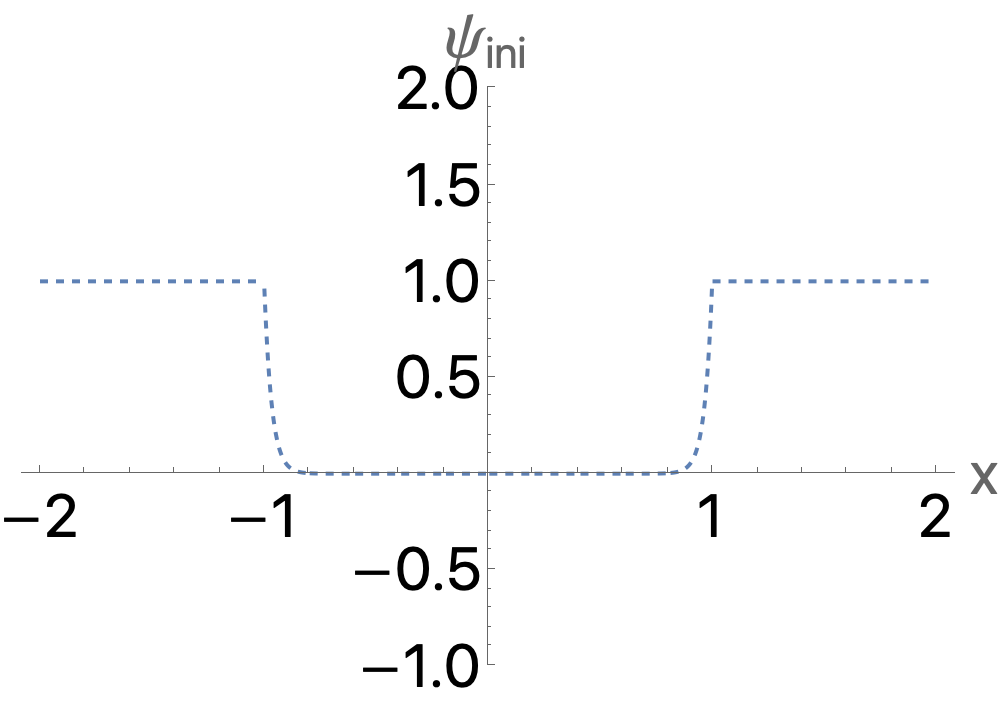
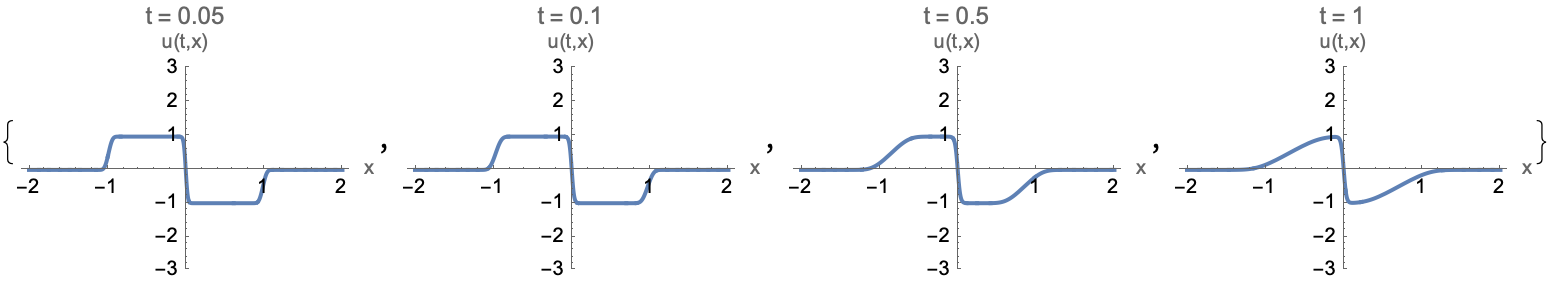

In [201]:
difco=0.01;
greenFunction[t_,x_,x0_]:=1/Sqrt[4 π difco t] Exp[-(x - x0)^2/(4 difco t)];
DgreenFunction[t_,x_,x0_]:=-(x - x0)/(2 difco t) * 1/Sqrt[4 π difco t] Exp[-(x - x0)^2/(4 difco t)];

(* 初期条件の定義 *)
initialCondition[x_]:=Exp[-30*(1-Abs[x])*HeavisideTheta[-(Abs[x]-1)]];

Plot[initialCondition[x],{x,-2,2},AxesLabel->{"x",Subscript["\[Psi]","ini"]},BaseStyle->{FontSize->30,FontFamily->"Latin Modern Roman"},ImageSize->500,PlotRange->{-1,2},PlotStyle->{Dashed,blue}]


(* 解の定義 *)
solution1[t_,x_]:= 
 NIntegrate[
  greenFunction[t,x,x0]*initialCondition[x0], 
  {x0,-5,5}, 
  Method -> "GlobalAdaptive"
 ];

solution2[t_,x_]:=NIntegrate[
  -0.033*DgreenFunction[t,x,x0]*initialCondition[x0], 
  {x0,-5,5}, 
  Method->"GlobalAdaptive"
 ];

(* 解をプロットする *)
tValues = {0.05,0.1,0.5,1}; (* 計算する時刻 *)
plots = Table[
   Plot[solution2[t, x]/solution1[t, x], {x, -2, 2}, PlotRange -> {-3,3}, 
    PlotLabel -> "t = " <> ToString[t], 
    AxesLabel -> {"x", "u(t,x)"}, PlotStyle -> Thick], 
   {t, tValues}]

(* プロットを表示 *)
GraphicsRow[plots];
